## Sklearn Work Flow
1.  Prepare the data set: data cleaning/ feature engineering/ split the training set and test set
2. Choose the model and train the model
3. Tuning and Optimization the the model: parameters
4. Test and predict

### 1. Prepare the Data Set
- Format of the data: shape(n_samples, n_features) / use np.reshape() to convert the shape
- Feature engineering: feature extraction ／ normalization 
- Train_test_split()

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
X = np.random.randint(0, 100, (10, 4))
y = np.random.randint(0, 3, 10)
y.sort()

print('Samples：')
print(X)
print('labels：', y)

Samples：
[[35 36 30 75]
 [22 13 78 30]
 [18 18 92 93]
 [28 55 41 25]
 [87 11 40 67]
 [ 5 71 35 21]
 [91 49  4 89]
 [66 16 40  2]
 [10 77 20 32]
 [67 63 79 81]]
labels： [0 0 0 0 0 1 1 2 2 2]


In [7]:
# random_state: ensure to get the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=7) 

print('Train Set：')
print(X_train)
print(y_train)

print('Test Set：')
print(X_test)
print(y_test)

Train Set：
[[22 13 78 30]
 [67 63 79 81]
 [66 16 40  2]
 [28 55 41 25]
 [91 49  4 89]
 [87 11 40 67]]
[0 2 2 0 1 0]
Test Set：
[[10 77 20 32]
 [ 5 71 35 21]
 [35 36 30 75]
 [18 18 92 93]]
[2 1 0 0]


In [8]:
# Normalization

from sklearn import preprocessing

x1 = np.random.randint(0, 1000, 5).reshape(5,1)
x2 = np.random.randint(0, 10, 5).reshape(5, 1)
x3 = np.random.randint(0, 100000, 5).reshape(5, 1)

X = np.concatenate([x1, x2, x3], axis=1)
print(X)

[[  415     2 52410]
 [  888     6 49012]
 [   80     3 41465]
 [  445     7  7995]
 [  748     8 31870]]


In [9]:
print(preprocessing.scale(X))

[[-0.35535365 -1.38218948  0.99579094]
 [ 1.32211417  0.34554737  0.78243767]
 [-1.54341225 -0.95025527  0.3085774 ]
 [-0.24896034  0.77748158 -1.79293353]
 [ 0.82561207  1.2094158  -0.29387248]]


/Users/freena/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


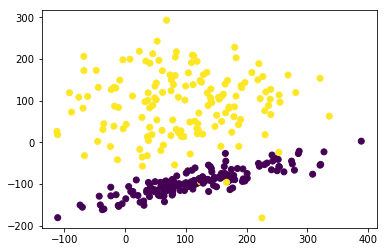

In [10]:
# 生成分类数据进行验证scale的必要性

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, 
                           random_state=25, n_clusters_per_class=1, scale=100)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [7]:
from sklearn import svm

X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=7) 
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
svm_classifier.score(X_test, y_test)

0.97999999999999998

### 2. Choose the Model

- Sklearn Algorithm cheat-sheet (http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- Score the estimator: regression -- coefficient of determination / classification -- accuracy

In [26]:
# load the Boston house price dataset
from sklearn import datasets

boston_data = datasets.load_boston()
X = boston_data.data
y = boston_data.target

print('Sample：')
print(X[:5, :])
print('label：')
print(y[:5])


Sample：
[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
    9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   7.18500000e+00   6.11000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.92830000e+02
    4.03000000e+00]
 [  3.23700000e-02   0.00000000e+00   2.18000000e+00   0.00000000e+00
    4.58000000e-01   6.99800000e+00   4.58000000e+01   6.06220000e+00
    3.00000000e+00   2.22000000e+02   1.87000000e+01   3.94630000e+02
    2.94000000e+00]
 [  6.90500000e-02   0.00000000e+00   2.18000000e+00   0.00000000e+00
  

In [12]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [13]:
from sklearn.model_selection import train_test_split

# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=7) 

In [14]:
# train the model
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# get the params
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [24]:
lr_model.coef_

array([ -1.07066231e-01,   2.73732501e-02,   1.29104342e-02,
         2.60075332e+00,  -1.58984600e+01,   5.29399841e+00,
        -1.36360107e-02,  -1.28979080e+00,   2.67111699e-01,
        -1.09133404e-02,  -9.86527713e-01,   1.00967985e-02,
        -3.90307854e-01])

In [16]:
lr_model.score(X_train, y_train) # r-squared

0.75967081116060942

In [17]:
lr_model.score(X_test, y_test) # r-squared

0.66980061222857568

### 3. Tuning and Optimization -- Cross-validation
- Tuning mostly based on experence 
- With limited experience, use the cross-calidation

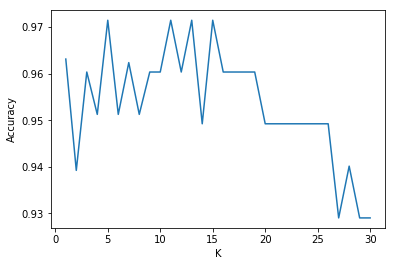

In [27]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3., random_state=10) 

k_range = range(1, 31) # k: 1-30 which one is the best?
cv_scores = []
for n in k_range:
    knn = KNeighborsClassifier(n)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy') # cv=10: 10 folders - for classification
    #scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error') # - for regression
    cv_scores.append(scores.mean())
    
plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [29]:
# Choose the best K

best_knn = KNeighborsClassifier(5)
best_knn.fit(X_train, y_train)
print(best_knn.score(X_test, y_test))
print(best_knn.predict(X_test))

0.96
[1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 2 2 2]
